In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
from lib import DihedralAdherence
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [111]:
from Bio.PDB import PDBParser
from lib.constants import AMINO_ACID_CODES
structure = PDBParser().get_structure('6poo', 'pdb/pdb6poo.ent')
structure.atom_to_internal_coordinates()
seq = ''.join([AMINO_ACID_CODES.get(r.resname, 'X') for r in structure.get_residues()])
seq.find('WTGQS')
# names = [AMINO_ACID_CODES.get(r.resname, 'X') for r in list(structure.get_residues())[152:152+5]]
list(structure.get_residues())[239+2].internal_coord.get_angle('phi')

55.99937674099932

Results already exist
PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
         seq res    phi    psi chain protein_id  weight
30237  WTGQS   G -172.7  169.6     A       6DXW       1
30238  WTGQS   G -172.0  170.5     B       6DXW       1
30239  WTGQS   G -172.9  171.5     C       6DXW       1
30240  WTGQS   G -172.1  170.5     D       6DXW       1
30241  WTGQS   G -164.4  167.9     B       6DXX       1
30242  WTGQS   G -164.3  170.0     D       6DXX       1
30243  WTGQS   G -163.9  169.4     F       6DXX       1
30244  WTGQS   G -177.6  172.0     B       6DXY       1
30245  WTGQS   G -178.6  172.9     D       6DXY       1
30246  WTGQS   G -168.4  166.6     B       6DXZ       1
30247  WTGQS   G -149.4  177.9     B       6DY0       1
30248  WTGQS   G -148.5 -179.8     B       6DY1       1
30249  WTGQS   G -162.1  167.8     B       6DY2       1
30250  WTGQS   G -162.1  168.3     D       6DY2       1
Window 6 centered at 241 of WTGQSG
Window 5: 14 samples, Window 6: 0 samples
KDEpeak:	 (-16

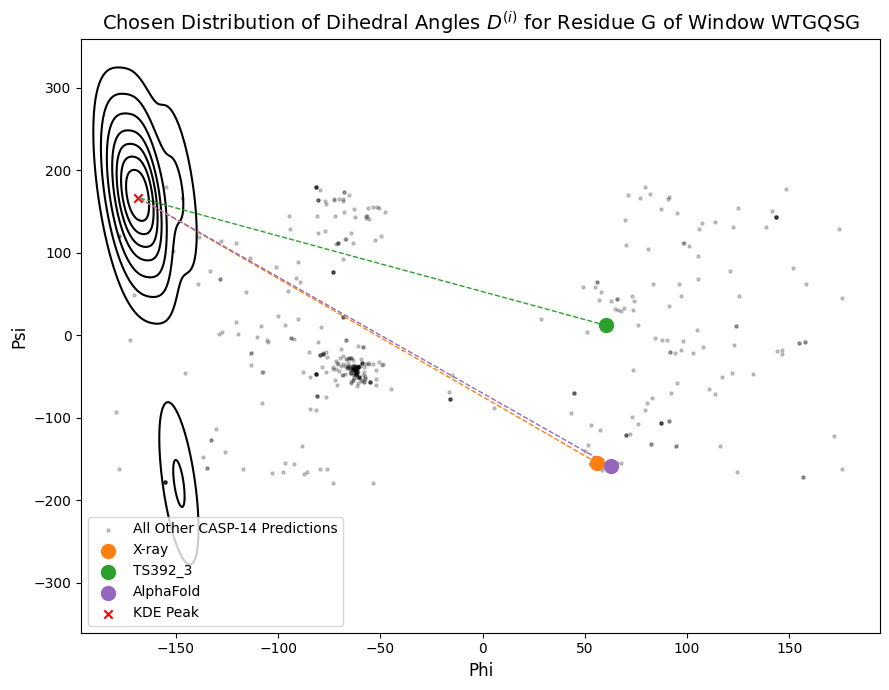

In [103]:
WINDOW_SIZE = 3
WINDOW_SIZE_CONTEXT = 4
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_id = 'T1030'   # 6ya2
da = DihedralAdherence(casp_protein_id, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
# da.check_alignment()
da.compute_structures()
da.query_pdbmine()
# da.load_results()
da.compute_mds(skip_existing=False)
da.load_results_md()
# da.plot_md_for_seq(i=241)
# da.plot_heatmap(fillna=False)
# da.check_alignment()
# da.compute_mds(replace=True)
# both = da.plot_res_vs_md(pred_id=da.alphafold_id)
# both = da.plot_heatmap()
# da.plot_md_vs_rmsd()

In [63]:
for protein in Path('tests').iterdir():
    casp_id = protein.name.split('_')[0]
    da = DihedralAdherence(casp_id, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    da.load_results()
    da.compute_mds(replace=True)

Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: KEFWNL - win5: 56, win6: 0
(1, 2) (484, 2) (56, 3) (0, 3)
1/393: EFWNLD - win5: 19, win6: 0
(1, 2) (484, 2) (19, 3) (0, 3)
2/393: FWNLDK - win5: 8, win6: 0
(1, 2) (484, 2) (8, 3) (0, 3)
3/393: WNLDKN - win5: 23, win6: 0
(1, 2) (484, 2) (23, 3) (0, 3)
4/393: NLDKNL - win5: 39, win6: 8
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (39, 3) (8, 3)
5/393: LDKNLQ - win5: 106, win6: 6
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (106, 3) (6, 3)
6/393: DKNLQL - win5: 30, win6: 0
(1, 2) (484, 2) (30, 3) (0, 3)
7/393: KNLQLR - win5: 149, win6: 24
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (149, 3) (24, 3)
8/393: NLQLRL - win5: 134, win6: 0
(1, 2) (484, 2) (134, 3) (0, 3)
9/393: LQLRLG - win5: 170, win6: 3
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (170, 3) (3, 3)
10/393: QLRLGI - win5: 48, win6: 2
(1, 2) (484, 2) (48, 3) (2, 3)
11/393:

In [ ]:
targetlist = pd.read_csv('targetlist.csv', sep=';')
for target in targetlist.Target.unique():
    try:
        da = DihedralAdherence(target, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    except ValueError as e:
        print(f'Skipping {target}: {e}')
    da.compute_structures()
    da.query_pdbmine()
    da.compute_mds()

Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Results already exist
PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Results already exist
PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Results already exist
PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Results already exist
PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Results already exist
PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Results already exist
PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Results already exist
PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Results already exist
PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Results already exist
PDB: 6ya2
Structure exists: 'pdb/pdb6ya2.ent' 
Results already exist
PDB: 6uv6
Structure exists: 'pdb/pdb6uv6.ent' 
Results already exist
PDB: 6vqp
Structure exists: 'pdb/pdb6vqp.ent' 
Model R-squared: 0.851160, Adj R-squared: 0.821368, p-value: 0.0


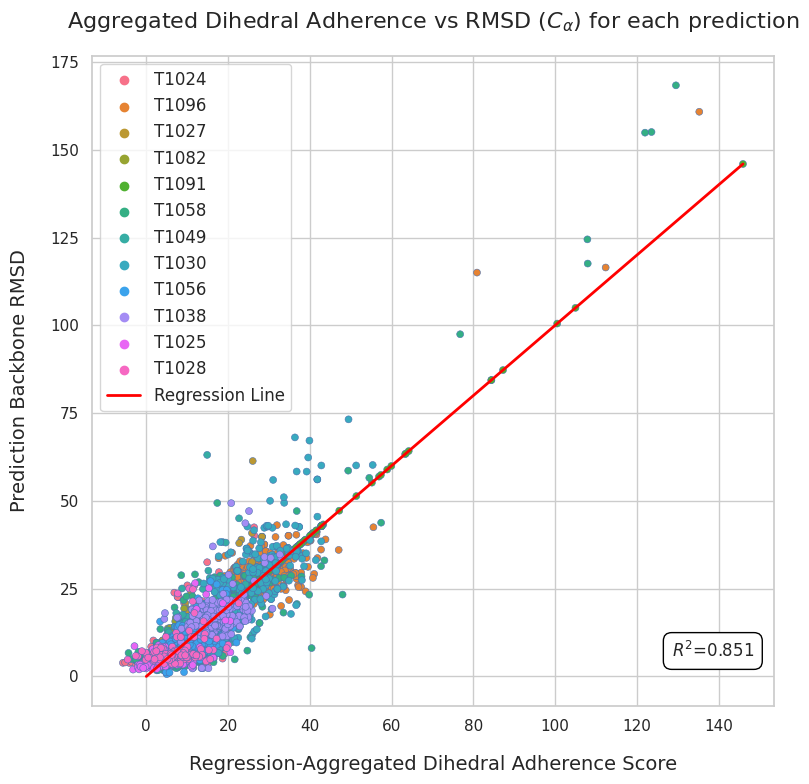

In [114]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
WINDOW_SIZE = 5
WINDOW_SIZE_CONTEXT = 6
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'], 
    WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds)